In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

This data was pulled from a MySQL Database that holds UFCStats.com Historical Data

In [4]:
df_fw = pd.read_csv('fw_historical.csv', error_bad_lines=False)
df_fw.dropna()

df_fw = df_fw.loc[df_fw.control_time != '--']


df_fw['seconds'] = df_fw['control_time'].str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw['control_time'].str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(dtype=int)
df_fw['minutes'] = df_fw['minutes'].astype(dtype=int)

df_fw['control_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])


df_fw['seconds'] = df_fw.ending_time.str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw.ending_time.str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(int)
df_fw['minutes'] = df_fw['minutes'].astype(int)

df_fw['ending_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])


df_fw.loc[df_fw.round_number != df_fw.ending_round,'ending_time'] = 300

df_fw['standing_time'] = df_fw.ending_time - df_fw.control_time

print(df_fw.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [5]:
df_fw.shape

(978, 42)

In [6]:
df_fw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   fight_id                                978 non-null    int64 
 1   fight_title                             978 non-null    object
 2   winning_fighter_name                    978 non-null    object
 3   losing_fighter_name                     978 non-null    object
 4   weight_class                            978 non-null    object
 5   method_of_victory                       978 non-null    object
 6   specific_victory_details                300 non-null    object
 7   ending_round                            978 non-null    int64 
 8   ending_time                             978 non-null    int32 
 9   fight_url                               978 non-null    object
 10  unique_round_id                         978 non-null    int64 
 11  unique

In [7]:
# creating the group frame

group_frame_fw = df_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_fw.head(30)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Akira Corassani,32,11,24,4,5,0,1,0,229
1,Alex Caceres,580,250,509,87,44,20,40,2,4176
2,Alex White,180,81,137,47,18,8,14,1,917
3,Alexander Volkanovski,513,283,393,58,135,27,46,3,2730
4,Alexandre Franca Nogueira,23,4,21,0,4,0,2,0,481
5,Andre Fili,1055,385,984,84,88,67,34,3,5655
6,Andy Ogle,141,48,117,33,8,16,1,0,672
7,Anistavio Medeiros,18,8,12,0,6,0,0,0,132
8,Arnold Allen,549,230,506,64,37,38,20,2,3721
9,Artem Lobov,813,333,621,102,126,6,30,0,4719


In [8]:
group_frame_fw['head_ratio'] = group_frame_fw.significant_strikes_head_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['body_ratio'] = group_frame_fw.significant_strikes_body_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['leg_ratio'] = group_frame_fw.significant_strikes_leg_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)


In [9]:
ratio_frame_fw = group_frame_fw[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_fw.head(148)

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Akira Corassani,0.727273,0.121212,0.151515
1,Alex Caceres,0.795312,0.135937,0.068750
2,Alex White,0.678218,0.232673,0.089109
3,Alexander Volkanovski,0.670648,0.098976,0.230375
4,Alexandre Franca Nogueira,0.840000,0.000000,0.160000
...,...,...,...,...
143,Yair Rodriguez,0.747021,0.123740,0.129239
144,Yaotzin Meza,0.704918,0.131148,0.163934
145,Yui Chul Nam,0.700000,0.227778,0.072222
146,Zabit Magomedsharipov,0.753425,0.121005,0.125571


<AxesSubplot:xlabel='head_ratio', ylabel='Count'>

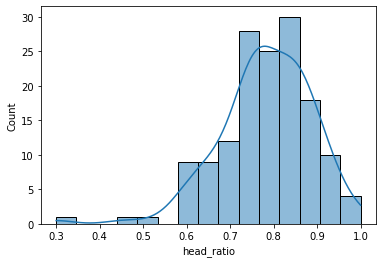

In [10]:
sns.histplot(data=ratio_frame_fw, x="head_ratio", kde=True)

<AxesSubplot:xlabel='body_ratio', ylabel='Count'>

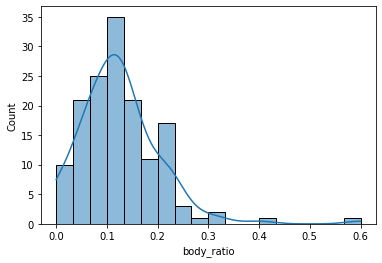

In [11]:
sns.histplot(data=ratio_frame_fw, x="body_ratio", kde=True)

<AxesSubplot:xlabel='leg_ratio', ylabel='Count'>

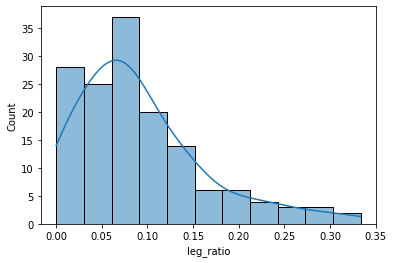

In [12]:
sns.histplot(data=ratio_frame_fw, x="leg_ratio", kde=True)

In [13]:
#STRIKE LOCATION
location_ratio_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [14]:
location_ratio_fw['standing_ratio'] = location_ratio_fw.significant_strikes_standing_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['ground_ratio'] = location_ratio_fw.significant_strikes_ground_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['clinch_ratio'] = location_ratio_fw.significant_strikes_clinch_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)

print('Strike Location')
location_ratio_fw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']]

Strike Location


,fighter_name,standing_ratio,ground_ratio,clinch_ratio
0,Akira Corassani,0.969697,0.000000,0.030303
1,Alex Caceres,0.906250,0.031250,0.062500
2,Alex White,0.891089,0.039604,0.069307
3,Alexander Volkanovski,0.875427,0.046075,0.078498
4,Alexandre Franca Nogueira,0.920000,0.000000,0.080000
...,...,...,...,...
143,Yair Rodriguez,0.808433,0.143905,0.047663
144,Yaotzin Meza,0.918033,0.000000,0.081967
145,Yui Chul Nam,0.500000,0.183333,0.316667
146,Zabit Magomedsharipov,0.831050,0.127854,0.041096


<AxesSubplot:xlabel='standing_ratio', ylabel='Count'>

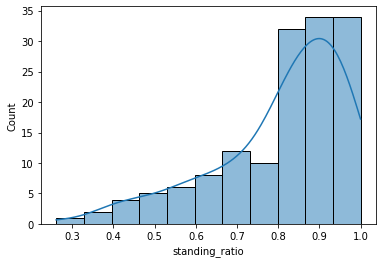

In [15]:
sns.histplot(data=location_ratio_fw, x="standing_ratio", kde=True)

<AxesSubplot:xlabel='ground_ratio', ylabel='Count'>

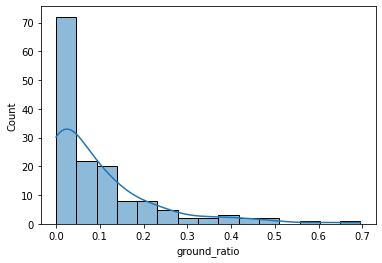

In [16]:
sns.histplot(data=location_ratio_fw, x="ground_ratio", kde=True)

<AxesSubplot:xlabel='clinch_ratio', ylabel='Count'>

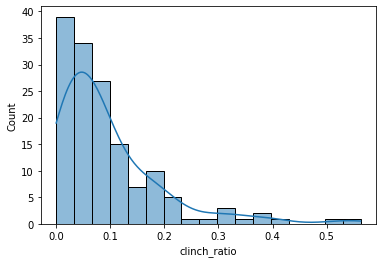

In [17]:
sns.histplot(data=location_ratio_fw, x="clinch_ratio", kde=True)

In [18]:
# Turn standing time to minutes
group_frame_fw['standing_time']=group_frame_fw.standing_time/60

In [19]:
#SApSM
sapsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [20]:
#SApSM_Ratio
sapsm_fw['SApSM'] = sapsm_fw.significant_strikes_standing_attempted / sapsm_fw.standing_time
print('Standing Attempts per Standing minute')
print(sapsm_fw)

Standing Attempts per Standing minute
                   fighter_name  significant_strikes_standing_attempted  \
0               Akira Corassani                                      32   
1                  Alex Caceres                                     580   
2                    Alex White                                     180   
3         Alexander Volkanovski                                     513   
4    Alexandre Franca Nogueira                                       23   
..                          ...                                     ...   
143              Yair Rodriguez                                     882   
144                Yaotzin Meza                                      56   
145                Yui Chul Nam                                      90   
146       Zabit Magomedsharipov                                     364   
147            Zubaira Tukhugov                                      22   

     standing_time  knockdowns      SApSM  
0         3.81666

In [21]:
filtered_sapsm = sapsm_fw.loc[sapsm_fw.SApSM < 80]
filtered_sapsm.max()

fighter_name                              Zubaira Tukhugov
significant_strikes_standing_attempted                1690
standing_time                                   146.633333
knockdowns                                               7
SApSM                                                 24.4
dtype: object

In [22]:
filtered_sapsm.SApSM.mean()

8.364267965950392

In [23]:
filtered_sapsm.SApSM.std()

4.30416203599027

In [24]:
mid_range = filtered_sapsm.SApSM.max() - filtered_sapsm.SApSM.min()
mid_range = mid_range / 2
mid_range

11.958389261744966

<AxesSubplot:xlabel='SApSM', ylabel='Count'>

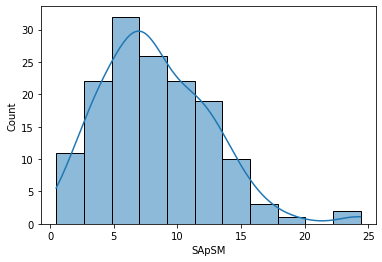

In [25]:
sns.histplot(data=filtered_sapsm, x="SApSM", kde=True)

<AxesSubplot:xlabel='SApSM'>

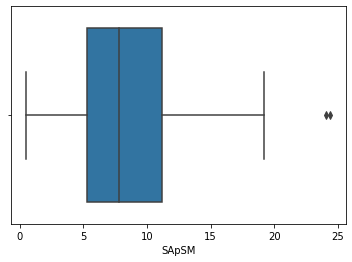

In [26]:
sns.boxplot(data=filtered_sapsm, x="SApSM")

In [27]:
print(f'Average strike Attempts per standing minute of FW: {sapsm_fw.SApSM.mean()}')

Average strike Attempts per standing minute of FW: 8.364267965950392


In [28]:
#SLpSM
slpsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [29]:
#SLpSM Ratio
slpsm_fw['SLpSM'] = slpsm_fw.significant_strikes_standing_landed / slpsm_fw.standing_time
print('Standing Lands per standing minute')
print(slpsm_fw)

Standing Lands per standing minute
                   fighter_name  significant_strikes_standing_landed  \
0               Akira Corassani                                   11   
1                  Alex Caceres                                  250   
2                    Alex White                                   81   
3         Alexander Volkanovski                                  283   
4    Alexandre Franca Nogueira                                     4   
..                          ...                                  ...   
143              Yair Rodriguez                                  366   
144                Yaotzin Meza                                   21   
145                Yui Chul Nam                                   26   
146       Zabit Magomedsharipov                                  159   
147            Zubaira Tukhugov                                   15   

     standing_time  knockdowns     SLpSM  
0         3.816667           0  2.882096  
1        69.60

In [30]:
slpsm_fw_filtered = slpsm_fw.loc[slpsm_fw.SLpSM < slpsm_fw.SLpSM.max()]
slpsm_fw_filtered.head()

,fighter_name,significant_strikes_standing_landed,standing_time,knockdowns,SLpSM
0,Akira Corassani,11,3.816667,0,2.882096
1,Alex Caceres,250,69.600000,2,3.591954
2,Alex White,81,15.283333,1,5.299891
3,Alexander Volkanovski,283,45.500000,3,6.219780
4,Alexandre Franca Nogueira,4,8.016667,0,0.498960


In [31]:
slpsm_fw_filtered.SLpSM.mean()

3.0647291148981886

In [32]:
slpsm_fw_filtered.SLpSM.std()

1.8205138596752892

<AxesSubplot:xlabel='SLpSM', ylabel='Count'>

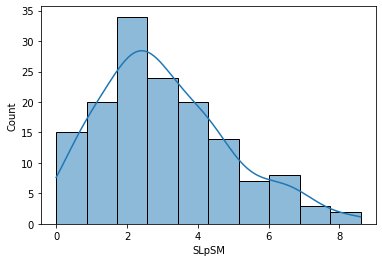

In [33]:
sns.histplot(data=slpsm_fw_filtered, x="SLpSM", kde=True)

<AxesSubplot:xlabel='SLpSM'>

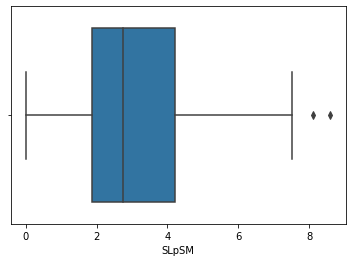

In [34]:
sns.boxplot(data=slpsm_fw_filtered, x="SLpSM")

In [35]:
accuracy_frame_fw = group_frame_fw[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame_fw['standing_accuracy'] = accuracy_frame_fw.significant_strikes_standing_landed/accuracy_frame_fw.significant_strikes_standing_attempted * 100
print('Overall Career Accuracy')
print(accuracy_frame_fw)

Overall Career Accuracy
                   fighter_name  significant_strikes_standing_landed  \
0               Akira Corassani                                   11   
1                  Alex Caceres                                  250   
2                    Alex White                                   81   
3         Alexander Volkanovski                                  283   
4    Alexandre Franca Nogueira                                     4   
..                          ...                                  ...   
143              Yair Rodriguez                                  366   
144                Yaotzin Meza                                   21   
145                Yui Chul Nam                                   26   
146       Zabit Magomedsharipov                                  159   
147            Zubaira Tukhugov                                   15   

     significant_strikes_standing_attempted  standing_accuracy  
0                                        32   

In [36]:
accuracy_frame_fw.standing_accuracy.mean()

36.366174623797605

In [37]:
accuracy_frame_fw.standing_accuracy.std()

10.46000651903112

In [38]:
accuracy_frame_fw.standing_accuracy.max()

68.18181818181817

In [39]:
accuracy_frame_fw.loc[accuracy_frame_fw.standing_accuracy == accuracy_frame_fw.standing_accuracy.max()]

,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,standing_accuracy
147,Zubaira Tukhugov,15,22,68.181818


<AxesSubplot:xlabel='standing_accuracy', ylabel='Count'>

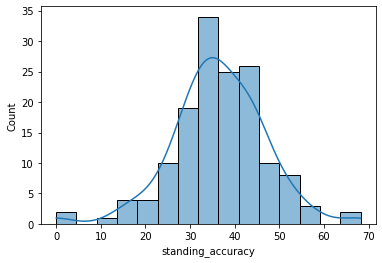

In [40]:
sns.histplot(data=accuracy_frame_fw, x="standing_accuracy", kde=True)

In [41]:
fw_expected_by_round = df_fw[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_round_id', 'winning_fighter_name','losing_fighter_name', 'fighter_name']]

perc = 0.36
#print(fw_performance.columns)
fw_expected_by_round['significant_strikes_standing_attempted'] = fw_expected_by_round['significant_strikes_standing_attempted'].astype(int)
fw_expected_by_round['expected_strike__standing_lands'] = fw_expected_by_round.significant_strikes_standing_attempted * perc

fw_expected_by_round.head(20)

<ipython-input-41-8d6a313fbbf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_expected_by_round['significant_strikes_standing_attempted'] = fw_expected_by_round['significant_strikes_standing_attempted'].astype(int)
<ipython-input-41-8d6a313fbbf0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_expected_by_round['expected_strike__standing_lands'] = fw_expected_by_round.significant_strikes_standing_attempted * perc


,significant_strikes_standing_attempted,significant_strikes_standing_landed,unique_round_id,winning_fighter_name,losing_fighter_name,fighter_name,expected_strike__standing_lands
0,11,3,451,Thiago Tavares,Clay Guida,Clay Guida,3.96
1,7,2,452,Thiago Tavares,Clay Guida,Thiago Tavares,2.52
2,29,5,453,Brian Ortega,Clay Guida,Brian Ortega,10.44
3,53,15,454,Brian Ortega,Clay Guida,Clay Guida,19.08
4,74,24,455,Brian Ortega,Clay Guida,Brian Ortega,26.64
5,70,23,456,Brian Ortega,Clay Guida,Clay Guida,25.20
6,82,31,457,Brian Ortega,Clay Guida,Brian Ortega,29.52
7,65,20,458,Brian Ortega,Clay Guida,Clay Guida,23.40
8,61,34,465,Yair Rodriguez,Jeremy Stephens,Yair Rodriguez,21.96
9,21,9,466,Yair Rodriguez,Jeremy Stephens,Jeremy Stephens,7.56


In [42]:
fw_expected_by_round['standing_efficiency'] = fw_expected_by_round.significant_strikes_standing_landed / fw_expected_by_round.expected_strike__standing_lands
fw_expected_by_round.head(20)

<ipython-input-42-02d6e2402bd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_expected_by_round['standing_efficiency'] = fw_expected_by_round.significant_strikes_standing_landed / fw_expected_by_round.expected_strike__standing_lands


,significant_strikes_standing_attempted,significant_strikes_standing_landed,unique_round_id,winning_fighter_name,losing_fighter_name,fighter_name,expected_strike__standing_lands,standing_efficiency
0,11,3,451,Thiago Tavares,Clay Guida,Clay Guida,3.96,0.757576
1,7,2,452,Thiago Tavares,Clay Guida,Thiago Tavares,2.52,0.793651
2,29,5,453,Brian Ortega,Clay Guida,Brian Ortega,10.44,0.478927
3,53,15,454,Brian Ortega,Clay Guida,Clay Guida,19.08,0.786164
4,74,24,455,Brian Ortega,Clay Guida,Brian Ortega,26.64,0.900901
5,70,23,456,Brian Ortega,Clay Guida,Clay Guida,25.20,0.912698
6,82,31,457,Brian Ortega,Clay Guida,Brian Ortega,29.52,1.050136
7,65,20,458,Brian Ortega,Clay Guida,Clay Guida,23.40,0.854701
8,61,34,465,Yair Rodriguez,Jeremy Stephens,Yair Rodriguez,21.96,1.548270
9,21,9,466,Yair Rodriguez,Jeremy Stephens,Jeremy Stephens,7.56,1.190476


In [43]:
#efficiency
efficient_fw_by_round = fw_expected_by_round[['standing_efficiency', 'expected_strike__standing_lands', 'unique_round_id', 'winning_fighter_name','losing_fighter_name', 'fighter_name']]

efficient_fw_by_round

,standing_efficiency,expected_strike__standing_lands,unique_round_id,winning_fighter_name,losing_fighter_name,fighter_name
0,0.757576,3.96,451,Thiago Tavares,Clay Guida,Clay Guida
1,0.793651,2.52,452,Thiago Tavares,Clay Guida,Thiago Tavares
2,0.478927,10.44,453,Brian Ortega,Clay Guida,Brian Ortega
3,0.786164,19.08,454,Brian Ortega,Clay Guida,Clay Guida
4,0.900901,26.64,455,Brian Ortega,Clay Guida,Brian Ortega
...,...,...,...,...,...,...
995,1.550388,15.48,7476,Grant Dawson,Julian Erosa,Julian Erosa
996,1.234568,3.24,7477,Grant Dawson,Julian Erosa,Grant Dawson
997,0.925926,3.24,7478,Grant Dawson,Julian Erosa,Julian Erosa
998,1.215278,5.76,7485,Luis Pena,Steven Peterson,Luis Pena


In [44]:
sns.histplot(data=efficient_fw, x="standing_efficiency", kde=True)

NameError: name 'efficient_fw' is not defined

In [ ]:
efficient_fw.loc[efficient_fw.fighter_name == "Brian Ortega"]

,standing_efficiency,expected_strike__standing_lands,unique_round_id,winning_fighter_name,losing_fighter_name,fighter_name
2,0.478927,10.44,453,Brian Ortega,Clay Guida,Brian Ortega
4,0.900901,26.64,455,Brian Ortega,Clay Guida,Brian Ortega
6,1.050136,29.52,457,Brian Ortega,Clay Guida,Brian Ortega
189,0.715488,23.76,2460,Brian Ortega,Frankie Edgar,Brian Ortega
223,0.781250,23.04,2648,Max Holloway,Brian Ortega,Brian Ortega
225,0.956790,32.40,2650,Max Holloway,Brian Ortega,Brian Ortega
227,0.974026,27.72,2652,Max Holloway,Brian Ortega,Brian Ortega
229,1.361656,18.36,2654,Max Holloway,Brian Ortega,Brian Ortega
276,0.777778,27.00,2761,Brian Ortega,Renato Moicano,Brian Ortega
278,0.857339,29.16,2763,Brian Ortega,Renato Moicano,Brian Ortega


In [ ]:
efficient_fw.loc[efficient_fw.fighter_name == "Max Holloway"]

,standing_efficiency,expected_strike__standing_lands,unique_round_id,winning_fighter_name,losing_fighter_name,fighter_name
34,1.388889,15.84,529,Max Holloway,Ricardo Lamas,Max Holloway
36,1.388889,21.60,531,Max Holloway,Ricardo Lamas,Max Holloway
38,1.082251,27.72,533,Max Holloway,Ricardo Lamas,Max Holloway
80,1.319444,14.40,837,Alexander Volkanovski,Max Holloway,Max Holloway
82,1.111111,19.80,839,Alexander Volkanovski,Max Holloway,Max Holloway
84,1.018519,21.60,841,Alexander Volkanovski,Max Holloway,Max Holloway
86,1.447574,25.56,843,Alexander Volkanovski,Max Holloway,Max Holloway
88,1.185185,27.00,845,Alexander Volkanovski,Max Holloway,Max Holloway
90,1.340996,10.44,847,Max Holloway,Charles Oliveira,Max Holloway
178,0.752315,17.28,2449,Max Holloway,Frankie Edgar,Max Holloway


In [ ]:
efficient_fw.loc[efficient_fw.fighter_name == "Alexander Volkanovski"]

,standing_efficiency,expected_strike__standing_lands,unique_round_id,winning_fighter_name,losing_fighter_name,fighter_name
81,1.339286,20.16,838,Alexander Volkanovski,Max Holloway,Alexander Volkanovski
83,1.620370,17.28,840,Alexander Volkanovski,Max Holloway,Alexander Volkanovski
85,1.543210,22.68,842,Alexander Volkanovski,Max Holloway,Alexander Volkanovski
87,1.313814,26.64,844,Alexander Volkanovski,Max Holloway,Alexander Volkanovski
89,1.411658,21.96,846,Alexander Volkanovski,Max Holloway,Alexander Volkanovski
333,1.909722,11.52,2850,Alexander Volkanovski,Darren Elkins,Alexander Volkanovski
335,1.904762,12.60,2852,Alexander Volkanovski,Darren Elkins,Alexander Volkanovski
337,1.906318,18.36,2854,Alexander Volkanovski,Darren Elkins,Alexander Volkanovski
436,0.957854,10.44,3085,Alexander Volkanovski,Mizuto Hirota,Alexander Volkanovski
438,1.428571,12.60,3087,Alexander Volkanovski,Mizuto Hirota,Alexander Volkanovski


In [ ]:
#-Start the Expected vs. Actual Strikes landed Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
x = fw_performance['expected_strike__standing_lands'].to_numpy()
y = fw_performance['significant_strikes_standing_landed'].to_numpy()
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=1)


In [ ]:
X_train= X_train.reshape(-1, 1)
Y_train= Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_test.shape

(98,)

In [ ]:
top_performers = fw_performance.loc[fw_performance['standing_efficiency'] > 1.13]
top_performers

,significant_strikes_standing_attempted,significant_strikes_standing_landed,unique_round_id,winning_fighter_name,losing_fighter_name,fighter_name,expected_strike__standing_lands,standing_efficiency
8,61,34,465,Yair Rodriguez,Jeremy Stephens,Yair Rodriguez,21.96,1.548270
9,21,9,466,Yair Rodriguez,Jeremy Stephens,Jeremy Stephens,7.56,1.190476
12,26,15,469,Yair Rodriguez,Jeremy Stephens,Yair Rodriguez,9.36,1.602564
13,22,9,470,Yair Rodriguez,Jeremy Stephens,Jeremy Stephens,7.92,1.136364
14,2,2,471,Yair Rodriguez,Jeremy Stephens,Yair Rodriguez,0.72,2.777778
...,...,...,...,...,...,...,...,...
989,98,40,7468,Shane Young,Rolando Dy,Shane Young,35.28,1.133787
990,19,8,7469,Teruto Ishihara,Horacio Gutierrez,Teruto Ishihara,6.84,1.169591
995,43,24,7476,Grant Dawson,Julian Erosa,Julian Erosa,15.48,1.550388
996,9,4,7477,Grant Dawson,Julian Erosa,Grant Dawson,3.24,1.234568


Intercept: 
 [-0.92657905]
Coefficients: 
 [[1.12706045]]
Mean squared error: 17.05
Root Mean Squared Error: 4.129007717918766
Coefficient of determination: 0.86


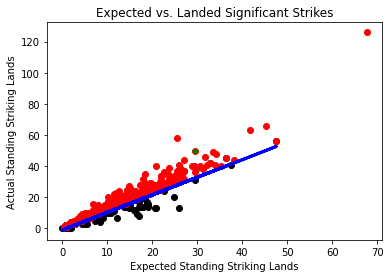

In [ ]:
Y_pred = model.predict(X_test)

# Change shape of array
Y_pred.shape = (98,)

# intercept
print("Intercept: \n", model.intercept_)
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test, Y_test, color="black")
plt.plot(X_test, Y_pred, color="blue", linewidth=3)

plt.plot(x[226], y[226], 'g*')

plt.scatter(top_performers.expected_strike__standing_lands, top_performers.significant_strikes_standing_landed, color='red')


plt.ylabel("Actual Standing Striking Lands")
plt.xlabel("Expected Standing Striking Lands")
plt.xticks()
plt.yticks()

plt.title("Expected vs. Landed Significant Strikes")

plt.show()

In [ ]:
df_accur = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

df_accur['Actual'] = df_accur.Actual.abs()
df_accur['Predicted'] = df_accur.Predicted.abs()

df_accur['Accuracy'] = (df_accur.Predicted / df_accur.Actual)
df_accur

,Actual,Predicted,Accuracy
0,19,19.870522,1.045817
1,0,0.059390,inf
2,20,27.191715,1.359586
3,16,13.769529,0.860596
4,7,9.702200,1.386029
...,...,...,...
191,6,4.414672,0.735779
192,12,13.769529,1.147461
193,6,6.855070,1.142512
194,4,3.601206,0.900302


In [ ]:
expected_by_target_by_fight = df_fw[[ 'significant_strikes_head_landed', 
                                     'significant_strikes_head_attempted', 
                                     'significant_strikes_body_landed', 
                                     'significant_strikes_body_attempted', 
                                     'significant_strikes_leg_landed', 
                                     'significant_strikes_leg_attempted', 
                                     'significant_strikes_ground_landed', 
                                     'significant_strikes_ground_attempted', 
                                     'significant_strikes_clinch_attempted', 
                                     'fight_id','fighter_name']].groupby(['fight_id', 'fighter_name']).sum().reset_index()

expected_by_target_by_fight['head_accuracy'] = expected_by_target_by_fight.significant_strikes_head_landed / expected_by_target_by_fight.significant_strikes_head_attempted
expected_by_target_by_fight['body_accuracy'] = expected_by_target_by_fight.significant_strikes_body_landed / expected_by_target_by_fight.significant_strikes_body_attempted
expected_by_target_by_fight['leg_accuracy'] = expected_by_target_by_fight.significant_strikes_leg_landed / expected_by_target_by_fight.significant_strikes_leg_attempted

fw_head_accuracy = expected_by_target_by_fight['head_accuracy'].mean()
fw_body_accuracy = expected_by_target_by_fight['body_accuracy'].mean()
fw_leg_accuracy = expected_by_target_by_fight['leg_accuracy'].mean()

expected_by_target_by_fight['expected_head_strikes'] = expected_by_target_by_fight.significant_strikes_head_attempted * fw_head_accuracy
expected_by_target_by_fight['expected_body_strikes'] = expected_by_target_by_fight.significant_strikes_body_attempted * fw_body_accuracy
expected_by_target_by_fight['expected_leg_strikes'] = expected_by_target_by_fight.significant_strikes_leg_attempted * fw_leg_accuracy
expected_by_target_by_fight

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes
0,69,Dan Ige,27,70,15,17,1,1,3,4,16,0.385714,0.882353,1.000000,24.685891,11.267429,0.807364
1,69,Mirsad Bektic,14,56,3,4,0,0,0,0,6,0.250000,0.750000,NaN,19.748712,2.651160,0.000000
2,78,Chan Sung Jung,46,60,0,0,0,0,38,42,0,0.766667,NaN,NaN,21.159335,0.000000,0.000000
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,3200,Kron Gracie,1,6,0,0,1,4,0,0,0,0.166667,NaN,0.250000,2.115933,0.000000,3.229454
392,3202,Andre Fili,65,179,9,16,24,31,0,0,0,0.363128,0.562500,0.774194,63.125349,10.604639,25.028269
393,3202,Myles Jury,47,110,10,11,19,22,4,9,0,0.427273,0.909091,0.863636,38.792114,7.290689,17.761997
394,3212,Gabriel Benitez,11,55,4,8,9,9,0,0,0,0.200000,0.500000,1.000000,19.396057,5.302319,7.266272


Regression using Seaborn Regression Plot

Text(0.5, 1.0, 'Expected strike lands vs. Actual standing lands')

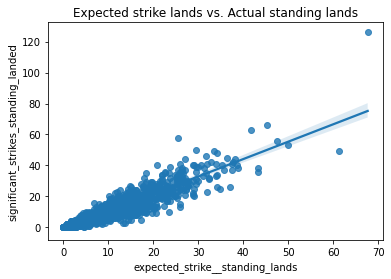

In [ ]:
sns.regplot(data=fw_performance, y='significant_strikes_standing_landed', x='expected_strike__standing_lands')
plt.title('Expected strike lands vs. Actual standing lands')

Text(0.5, 1.0, 'Expected head strike lands vs. Actual head strike lands')

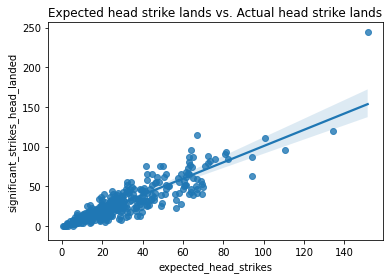

In [ ]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_head_landed', x='expected_head_strikes')
plt.title('Expected head strike lands vs. Actual head strike lands')

Text(0.5, 1.0, 'Expected body strike lands vs. Actual body strike lands')

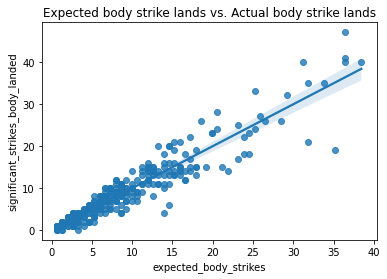

In [ ]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_body_landed', x='expected_body_strikes')
plt.title('Expected body strike lands vs. Actual body strike lands')

Text(0.5, 1.0, 'Expected leg strike lands vs. Actual leg strike lands')

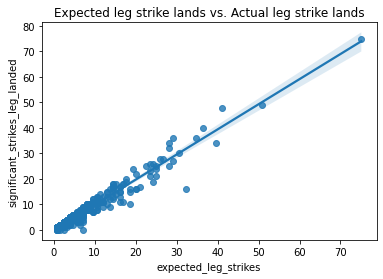

In [ ]:
sns.regplot(data=expected_by_target_by_fight, y='significant_strikes_leg_landed', x='expected_leg_strikes')
plt.title('Expected leg strike lands vs. Actual leg strike lands')

In [ ]:
expected_by_target_by_fight = expected_by_target_by_fight.dropna()
x_expected = expected_by_target_by_fight['expected_head_strikes'].to_numpy()
y_landed = expected_by_target_by_fight['significant_strikes_head_landed'].to_numpy()
X_train_head,X_test_head,y_train_head,y_test_head = train_test_split(x_expected, y_landed, test_size=0.10, train_size=0.90, random_state=3)


In [ ]:
X_train_head= X_train_head.reshape(-1, 1)
y_train_head= y_train_head.reshape(-1, 1)
X_test_head = X_test_head.reshape(-1, 1)

In [ ]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
expected_by_target_by_fight

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes
0,69,Dan Ige,27,70,15,17,1,1,3,4,16,0.385714,0.882353,1.000000,24.685891,11.267429,0.807364
1,69,Mirsad Bektic,14,56,3,4,0,0,0,0,6,0.250000,0.750000,NaN,19.748712,2.651160,0.000000
2,78,Chan Sung Jung,46,60,0,0,0,0,38,42,0,0.766667,NaN,NaN,21.159335,0.000000,0.000000
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,3200,Kron Gracie,1,6,0,0,1,4,0,0,0,0.166667,NaN,0.250000,2.115933,0.000000,3.229454
392,3202,Andre Fili,65,179,9,16,24,31,0,0,0,0.363128,0.562500,0.774194,63.125349,10.604639,25.028269
393,3202,Myles Jury,47,110,10,11,19,22,4,9,0,0.427273,0.909091,0.863636,38.792114,7.290689,17.761997
394,3212,Gabriel Benitez,11,55,4,8,9,9,0,0,0,0.200000,0.500000,1.000000,19.396057,5.302319,7.266272


In [ ]:
expected_by_target_by_fight['head_efficiency'] = expected_by_target_by_fight.significant_strikes_head_landed / expected_by_target_by_fight.expected_head_strikes
expected_by_target_by_fight['body_efficiency'] = expected_by_target_by_fight.significant_strikes_body_landed / expected_by_target_by_fight.expected_body_strikes
expected_by_target_by_fight['leg_efficiency'] = expected_by_target_by_fight.significant_strikes_leg_landed / expected_by_target_by_fight.expected_leg_strikes




In [ ]:
top_target_performers_head = expected_by_target_by_fight.loc[expected_by_target_by_fight.head_efficiency > 1.13]
top_target_performers_head

,fight_id,fighter_name,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,head_accuracy,body_accuracy,leg_accuracy,expected_head_strikes,expected_body_strikes,expected_leg_strikes,head_efficiency,body_efficiency,leg_efficiency
2,78,Chan Sung Jung,46,60,0,0,0,0,38,42,0,0.766667,NaN,NaN,21.159335,0.000000,0.000000,2.173981,NaN,NaN
3,78,Frankie Edgar,6,11,1,1,2,2,0,0,0,0.545455,1.000000,1.000000,3.879211,0.662790,1.614727,1.546706,1.508774,1.238599
4,80,Charles Jourdain,38,84,23,37,3,8,8,10,4,0.452381,0.621622,0.375000,29.623069,24.523227,6.458908,1.282784,0.937886,0.464475
6,111,Sean Soriano,14,21,3,3,2,2,6,6,6,0.666667,1.000000,1.000000,7.405767,1.988370,1.614727,1.890419,1.508774,1.238599
7,111,Tatsuya Kawajiri,30,34,0,0,2,2,26,26,0,0.882353,NaN,1.000000,11.990290,0.000000,1.614727,2.502025,NaN,1.238599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,3167,Jimy Hettes,16,40,13,17,5,7,1,1,36,0.400000,0.764706,0.714286,14.106223,11.267429,5.651545,1.134251,1.153768,0.884714
383,3172,Rob Whiteford,14,34,9,12,3,4,3,5,11,0.411765,0.750000,0.750000,11.990290,7.953479,3.229454,1.167611,1.131580,0.928950
385,3173,Max Holloway,244,430,41,55,5,5,1,1,10,0.567442,0.745455,1.000000,151.641900,36.453446,4.036818,1.609054,1.124722,1.238599
388,3190,Mirsad Bektic,4,10,0,0,0,0,0,0,0,0.400000,NaN,NaN,3.526556,0.000000,0.000000,1.134251,NaN,NaN


Intercept: 
 [-0.92657905]
Coefficients: 
 [[1.12706045]]
Mean squared error: 110.72
Root Mean Squared Error: 10.522410424446988
Coefficient of determination: 0.85


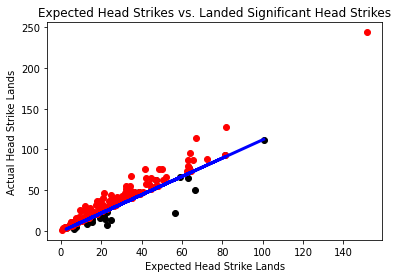

In [ ]:
Y_pred_head = regr.predict(X_test_head)

# Change shape of array
#Y_pred_head.shape = (196,)

# intercept
print("Intercept: \n", regr.intercept_)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_head, Y_pred_head))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_head, Y_pred_head)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_head, Y_pred_head))

# Plot outputs
plt.scatter(X_test_head, y_test_head, color="black")
plt.plot(X_test_head, Y_pred_head, color="blue", linewidth=3)

plt.scatter(top_target_performers_head.expected_head_strikes, top_target_performers_head.significant_strikes_head_landed, color="red")

plt.ylabel("Actual Head Strike Lands")
plt.xlabel("Expected Head Strike Lands")
plt.xticks()
plt.yticks()

plt.title("Expected Head Strikes vs. Landed Significant Head Strikes")

plt.show()

In [ ]:
x_body = expected_by_target_by_fight['expected_body_strikes'].to_numpy()
y_body = expected_by_target_by_fight['significant_strikes_body_landed'].to_numpy()
X_train_body,X_test_body,y_train_body,y_test_body = train_test_split(x_body, y_body, test_size=0.10, train_size=0.90, random_state=1)


In [ ]:
X_train_body= X_train_body.reshape(-1, 1)
y_train_body= y_train_body.reshape(-1, 1)
X_test_body = X_test_body.reshape(-1, 1)

In [ ]:
regr_body = LinearRegression()
regr_body.fit(X_train_body, y_train_body)

LinearRegression()

Intercept: 
 [0.02200664]
Coefficients: 
 [[0.98965877]]
Mean squared error: 3.47
Root Mean Squared Error: 1.862967411053302
Coefficient of determination: 0.95


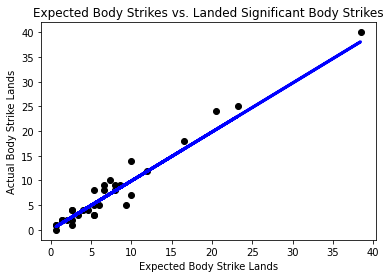

In [ ]:
Y_pred_body = regr_body.predict(X_test_body)

# Change shape of array
#Y_pred_head.shape = (196,)

# intercept
print("Intercept: \n", regr_body.intercept_)
# The coefficients
print("Coefficients: \n", regr_body.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_body, Y_pred_body))
# root mean squared error
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_body, Y_pred_body)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_body, Y_pred_body))

# Plot outputs
plt.scatter(X_test_body, y_test_body, color="black")
plt.plot(X_test_body, Y_pred_body, color="blue", linewidth=3)

plt.ylabel("Actual Body Strike Lands")
plt.xlabel("Expected Body Strike Lands")
plt.xticks()
plt.yticks()

plt.title("Expected Body Strikes vs. Landed Significant Body Strikes")

plt.show()

<AxesSubplot:xlabel='head_efficiency'>

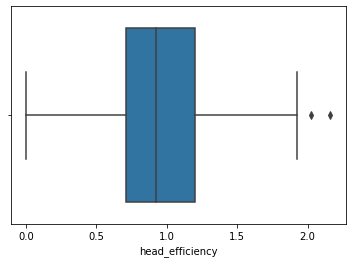

In [ ]:
sns.boxplot(data=expected_by_target_by_fight, x="head_efficiency")

<AxesSubplot:xlabel='body_efficiency'>

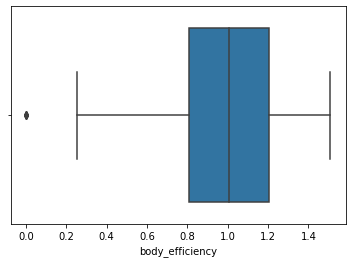

In [ ]:
sns.boxplot(data=expected_by_target_by_fight, x="body_efficiency")

<AxesSubplot:xlabel='leg_efficiency'>

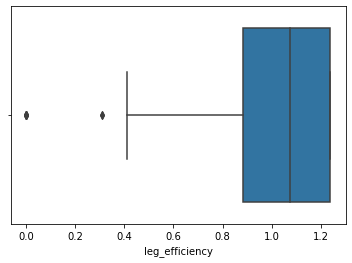

In [ ]:
sns.boxplot(data=expected_by_target_by_fight, x="leg_efficiency")